In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import threading
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori, fpgrowth

In [60]:
data = pd.read_csv('Supermarket.csv')

In [61]:
transactions = []
for index, row in data.iterrows():
    transactions.append(row.dropna().tolist())

In [62]:
transactions_df = pd.DataFrame(transactions)

In [63]:
one_hot_encoded = pd.get_dummies(transactions_df.stack()).groupby(level=0).sum()
transactions_encoded = (one_hot_encoded > 0).astype(int)

In [64]:
executiontime = [0, 0]
apriori_completed = threading.Event()
fp_completed = threading.Event()

In [65]:
def run_apriori():
    stime = time.time()
    apriori_results = apriori(transactions_encoded, min_support=0.02, use_colnames=True)
    executiontime[0] = time.time() - stime
    apriori_completed.set()

In [66]:
def run_fp():
    stime = time.time()
    fp_results = fpgrowth(transactions_encoded, min_support=0.02, use_colnames=True)
    executiontime[1] = time.time() - stime
    fp_completed.set()

In [67]:
apriori_thread = threading.Thread(target=run_apriori)
fp_thread = threading.Thread(target=run_fp)

In [68]:
apriori_thread.start()
fp_thread.start()

# Wait for the threads to signal completion
apriori_completed.wait()
fp_completed.wait()

# Join the threads to ensure they have finished
apriori_thread.join()
fp_thread.join()

# Print execution times
print(f"Apriori execution time: {executiontime[0]} seconds")
print(f"FP-Growth execution time: {executiontime[1]} seconds")

Apriori execution time: 0.14162111282348633 seconds
FP-Growth execution time: 0.09095883369445801 seconds


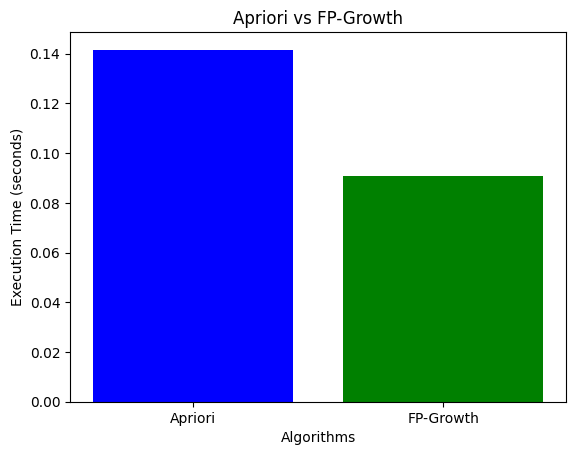

FP-Growth is Faster


In [69]:
algorithms = ['Apriori', 'FP-Growth']
plt.bar(algorithms, executiontime, color=['blue', 'green'])
plt.xlabel('Algorithms')
plt.ylabel('Execution Time (seconds)')
plt.title('Apriori vs FP-Growth')
plt.show()

# Compare execution times
if executiontime[0] < executiontime[1]:
    print("Apriori is Faster")
elif executiontime[1] < executiontime[0]:
    print("FP-Growth is Faster")
else:
    print("Both are equal")